# COGS 108 - Final Project: Alternative Modes of Transportation & Smog Pollution


## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Video

[Video](https://drive.google.com/file/d/1xVz8FKslHnOYRRDobStwktbfdyg_j8ZD/view?usp=sharing)

# Overview

Our group analyzed data related to greenhouse gas emissions, public transit ridership, and walkability for all 50 US states. We used this data to help create visualizations related to pollution, miles travelled, population density, and walkability for each state to get an idea of how these factors helped to answer our question of whether less smog pollution results from higher walkability, more public transit and more people taking public transit. We found out that factors like walkability, distance to the location you want to travel, and public transit ridership help to contribute to lower smog pollution overall.

# Names

- Jeffrey Wang
- Justin Bui
- Naasik Jahan
- Samantha Prestrelski
- Thuan Do

<a id='research_question'></a>
# Research Question

Is increased availability of public transportation and walkability in cities an effective way of reducing smog pollution? In measurable terms, do US states with 
1. higher walkability indices
2. more public transportation infrastructure, and 
3. high public transportation ridership numbers 

have less smog pollution, thus indicating that people choose to use these resources?

<a id='background'></a>

## Background & Prior Work

According to the United States Environmental Protection Agency, net emissions of greenhouse gasses from human activities increased by 43% from 1990 to 2015 [^EPA]. Additionally, “nearly 60% of the US carbon dioxide emissions are from passenger cars, S.U.V.s, and pickup trucks” [^NYT]. Increased amounts of greenhouse gasses trapped in the atmosphere lead to warming climates around the world and negatively affect generations of people, plants, and animals. Thus, there is a need for methods to reduce car pollution. While there are methods like reducing the amount of miles driven or driving a less polluting vehicle (ie. electric or hybrid) [^WA], infrastructure development and neighborhood design can encourage citizens to take alternative modes of transportation. 
To decrease reliance on cars, cities can develop 
public transportation infrastructure such as bus stations, railways, and trolley services
micro mobility infrastructure such as dedicated or separated bike lanes and invest in e-bike or e-scooter sharing services
pedestrian infrastructure such as sidewalks, trails, and safe street and crosswalk design
A neighborhood designed for safe pedestrian access to grocery stores and other necessary buildings can positively influence overall health ratings, as well as air pollution emissions [^NIH] [^Mayo]. However, even if a city has a high availability of car alternatives, that does not necessarily mean people choose to do so. An NIH study found that there were high walkability and nitric oxide concentrations (vehicle emission markers) near city centers and higher income neighborhoods tended to have lower pollution [^NIH].

References
1. [^EPA]: https://www.epa.gov/climate-indicators/greenhouse-gases 
2. [^Mayo]: https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/walking/art-20046261  
3. [^NIH]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2801167/
4. [^NYT]: https://www.nytimes.com/2021/01/21/learning/whats-going-on-in-this-graph-climate-friendly-cars.html 
5. [^WA]: https://ecology.wa.gov/Issues-and-local-projects/Education-training/What-you-can-do/Reducing-car-pollution

# Hypothesis


We expect that higher availability of alternative modes of transport should decrease the amount of pollution in cities. We believe that if people have accessible options such as walking and public transportation, there will be less car usage and thus less greenhouse gas pollution.

# Dataset(s)

### Greenhouse Gas Emissions
- Dataset Name: Greenhouse Gas Emissions
- Link to the dataset: https://catalog.data.gov/dataset/national-greenhouse-gas-emission-inventory
- Number of observations: 51, 5, 32
- Description: This data includes information about the emission of CO2 and other greenhouse gases per year in the United States, organized by state. We expect to use this data to help us see if there is a correlation between an increase in public transportation and a decrease in greenhouse gases.

### Ridership
- Dataset Name: Ridership
- Link to the dataset: https://www.transit.dot.gov/ntd/data-product/monthly-module-adjusted-data-release
- Number of observations: 2251
- Description: This data includes information about public transportation usage, reported by different public transportation agencies. Info included for one public transportation agency would include (for example) the population of their service area, the size of it, and the amount of miles traveled/unlinked passenger trips made, for the year of 2021, in a master dataset.

### Walkability
- Dataset Name: Walkability Index
- Link to the dataset: https://catalog.data.gov/dataset/walkability-index
- Number of observations: 220,740
- Description: This data includes information about the walkability of certain cities. It gives a rating/index for different cities based on their perceived walkability. We expect to use these indices to see if there is a correlation between walkability and use of public transportation. We predict that the more walkable a city is, the higher the public transportation use is in that city.

We plan to compare these datasets by normalizing everything into observations by state. The ridership and greenhouse gas emissions datasets already are by state, but the walkability dataset is by city so we will need to clean it. Then, we will have a single dataframe and can perform exploratory data analysis from there.

# Setup

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sns

In [2]:
greenhouse = pd.read_csv('Greenhouse.csv', index_col = 0)
walkability_df = pd.read_csv("walkability_by_state.csv")
ridership_df = pd.read_csv("ridership.csv", index_col = 0)

# Data Cleaning

We exported our dataframes as .csvs to for convenience. Data cleaning steps, as summarized below, can be found in the Data Checkpoint.

If running this notebook locally, you will see two images for each chloropleth map: one interactive, and one generated by the Python Image library so it shows up on the GitHub notebook preview.

Greenhouse Gas Dataset
- Kept only the row showing gross total emissions for each csv of every state.
- Combined the separate csv files for all 51 states into one main csv file as `Greenhouse.csv` (Done in Data Cleaning Checkpoint).
- Read in `Greenhouse.csv` file.

Ridership
- Removed irrelevant columns
- Filtered to 50 continental US States
- Combined cities into one observation for entire state by summing travel data
- Read in `ridership.csv`

Walkability
- Removed irrelevant columns
- Replaced FIPS codes with state abbreviations
- Filtered to positive values only, as not all observations have all metrics available
- Combined cities into one observation for entire state by averaging values
- Read in `walkability_by_state.csv`

Our final cleaning step is to merge all three datasets into a single dataframe.

In [3]:
# ridership + greenhouse
merged_df = ridership_df.merge(greenhouse.reset_index(), left_on='HQ State', right_on="index")
merged_df['Trip Pollution'] = merged_df['2020'] / merged_df['Trips Per Person']
merged_df['Miles Pollution'] = merged_df['2020'] / merged_df['Miles Per Person']

In [4]:
# rename walkability columns
walkability_df = walkability_df.rename(columns={"D2B_E8MIXA": "EmploymentMix", 
                               "D3B": "IntersectionDensity", 
                               "D4A": "DistToTransit",
                               "D4B025" : "1/4MileToTransit",
                               "D4B050" : "1/2MileToTransit",
                               "D5BR" : "JobsWithin45MinTransit",
                               "D5BE": "PopWithin45MinTransit"})
merged_df = merged_df.merge(walkability_df, left_on="HQ State", right_on="STATEFP")
# drop duplicate columns
merged_df = merged_df.drop(columns=["index", "STATEFP"])

In [5]:
merged_df.head()

,HQ State,Service Area Population,Service Area SQ Miles,Passenger Miles FY,Unlinked Passenger Trips FY,Miles Per Person,Trips Per Person,1990,1991,1992,...,Trip Pollution,Miles Pollution,EmploymentMix,IntersectionDensity,DistToTransit,1/4MileToTransit,1/2MileToTransit,JobsWithin45MinTransit,PopWithin45MinTransit,NatWalkInd
0,WA,6177562.0,5994.0,678216857.0,116395619.0,109.787139,18.841676,34.942811,33.954200,37.976183,...,1.648357,0.282891,0.545198,86.406689,491.290462,0.243989,0.423175,131607.457402,66521.660615,10.503868
1,OR,2527725.0,1116.0,211458353.0,49203010.0,83.655601,19.465333,18.650037,18.706351,19.397727,...,0.978679,0.227723,0.619251,90.247010,494.521717,0.330803,0.528073,56084.092849,36219.159746,11.471147
2,ID,1580926.0,733.0,8558086.0,1028342.0,5.413337,0.650468,55.500430,54.279116,56.462323,...,83.211213,9.998683,0.602059,55.377241,547.783493,NaN,NaN,26547.067568,12061.452703,7.976636
3,AK,388828.0,7415.0,34635915.0,2360169.0,89.077728,6.069956,27.804661,27.669484,28.821505,...,5.585581,0.380614,0.552704,46.665058,502.789939,0.000049,0.000197,50234.596685,276.580110,8.204744
4,RI,1048319.0,1436.0,47674379.0,7985997.0,45.476977,7.617907,4.141120,3.956040,4.105165,...,0.449836,0.075353,0.592975,126.632724,455.243699,0.172594,0.342470,52852.815000,38545.235000,12.587935


# Data Analysis & Results

Since most of our data is geospatial, choropleth maps are a great tool for visualization. We defined a helper function since we'll be making a lot of these.

In [6]:
def make_choropleth(df=None,
                    locations='HQ State',
                    locationmode="USA-states",
                    scope="usa",
                    color="",
                    color_continuous_scale="Viridis_r",
                    title_text="",
                    title_font_family="Times New Roman",
                    title_font_size = 22,
                    title_font_color="black", 
                    title_x=0.45, 
                    ):
  fig = px.choropleth(df,
                    locations=locations,
                    locationmode=locationmode, 
                    scope=scope,
                    color=color,
                    color_continuous_scale=color_continuous_scale, 
                    )
  fig.update_layout(
      title_text = title_text,
      title_font_family=title_font_family,
      title_font_size = title_font_size,
      title_font_color=title_font_color, 
      title_x=title_x, 
         )
  return fig

### Greenhouse

For our EDA for the greenhouse, we will generate a line plot showing the progression of gross total carbon emission for all 51 states from the time period 1990-2020.

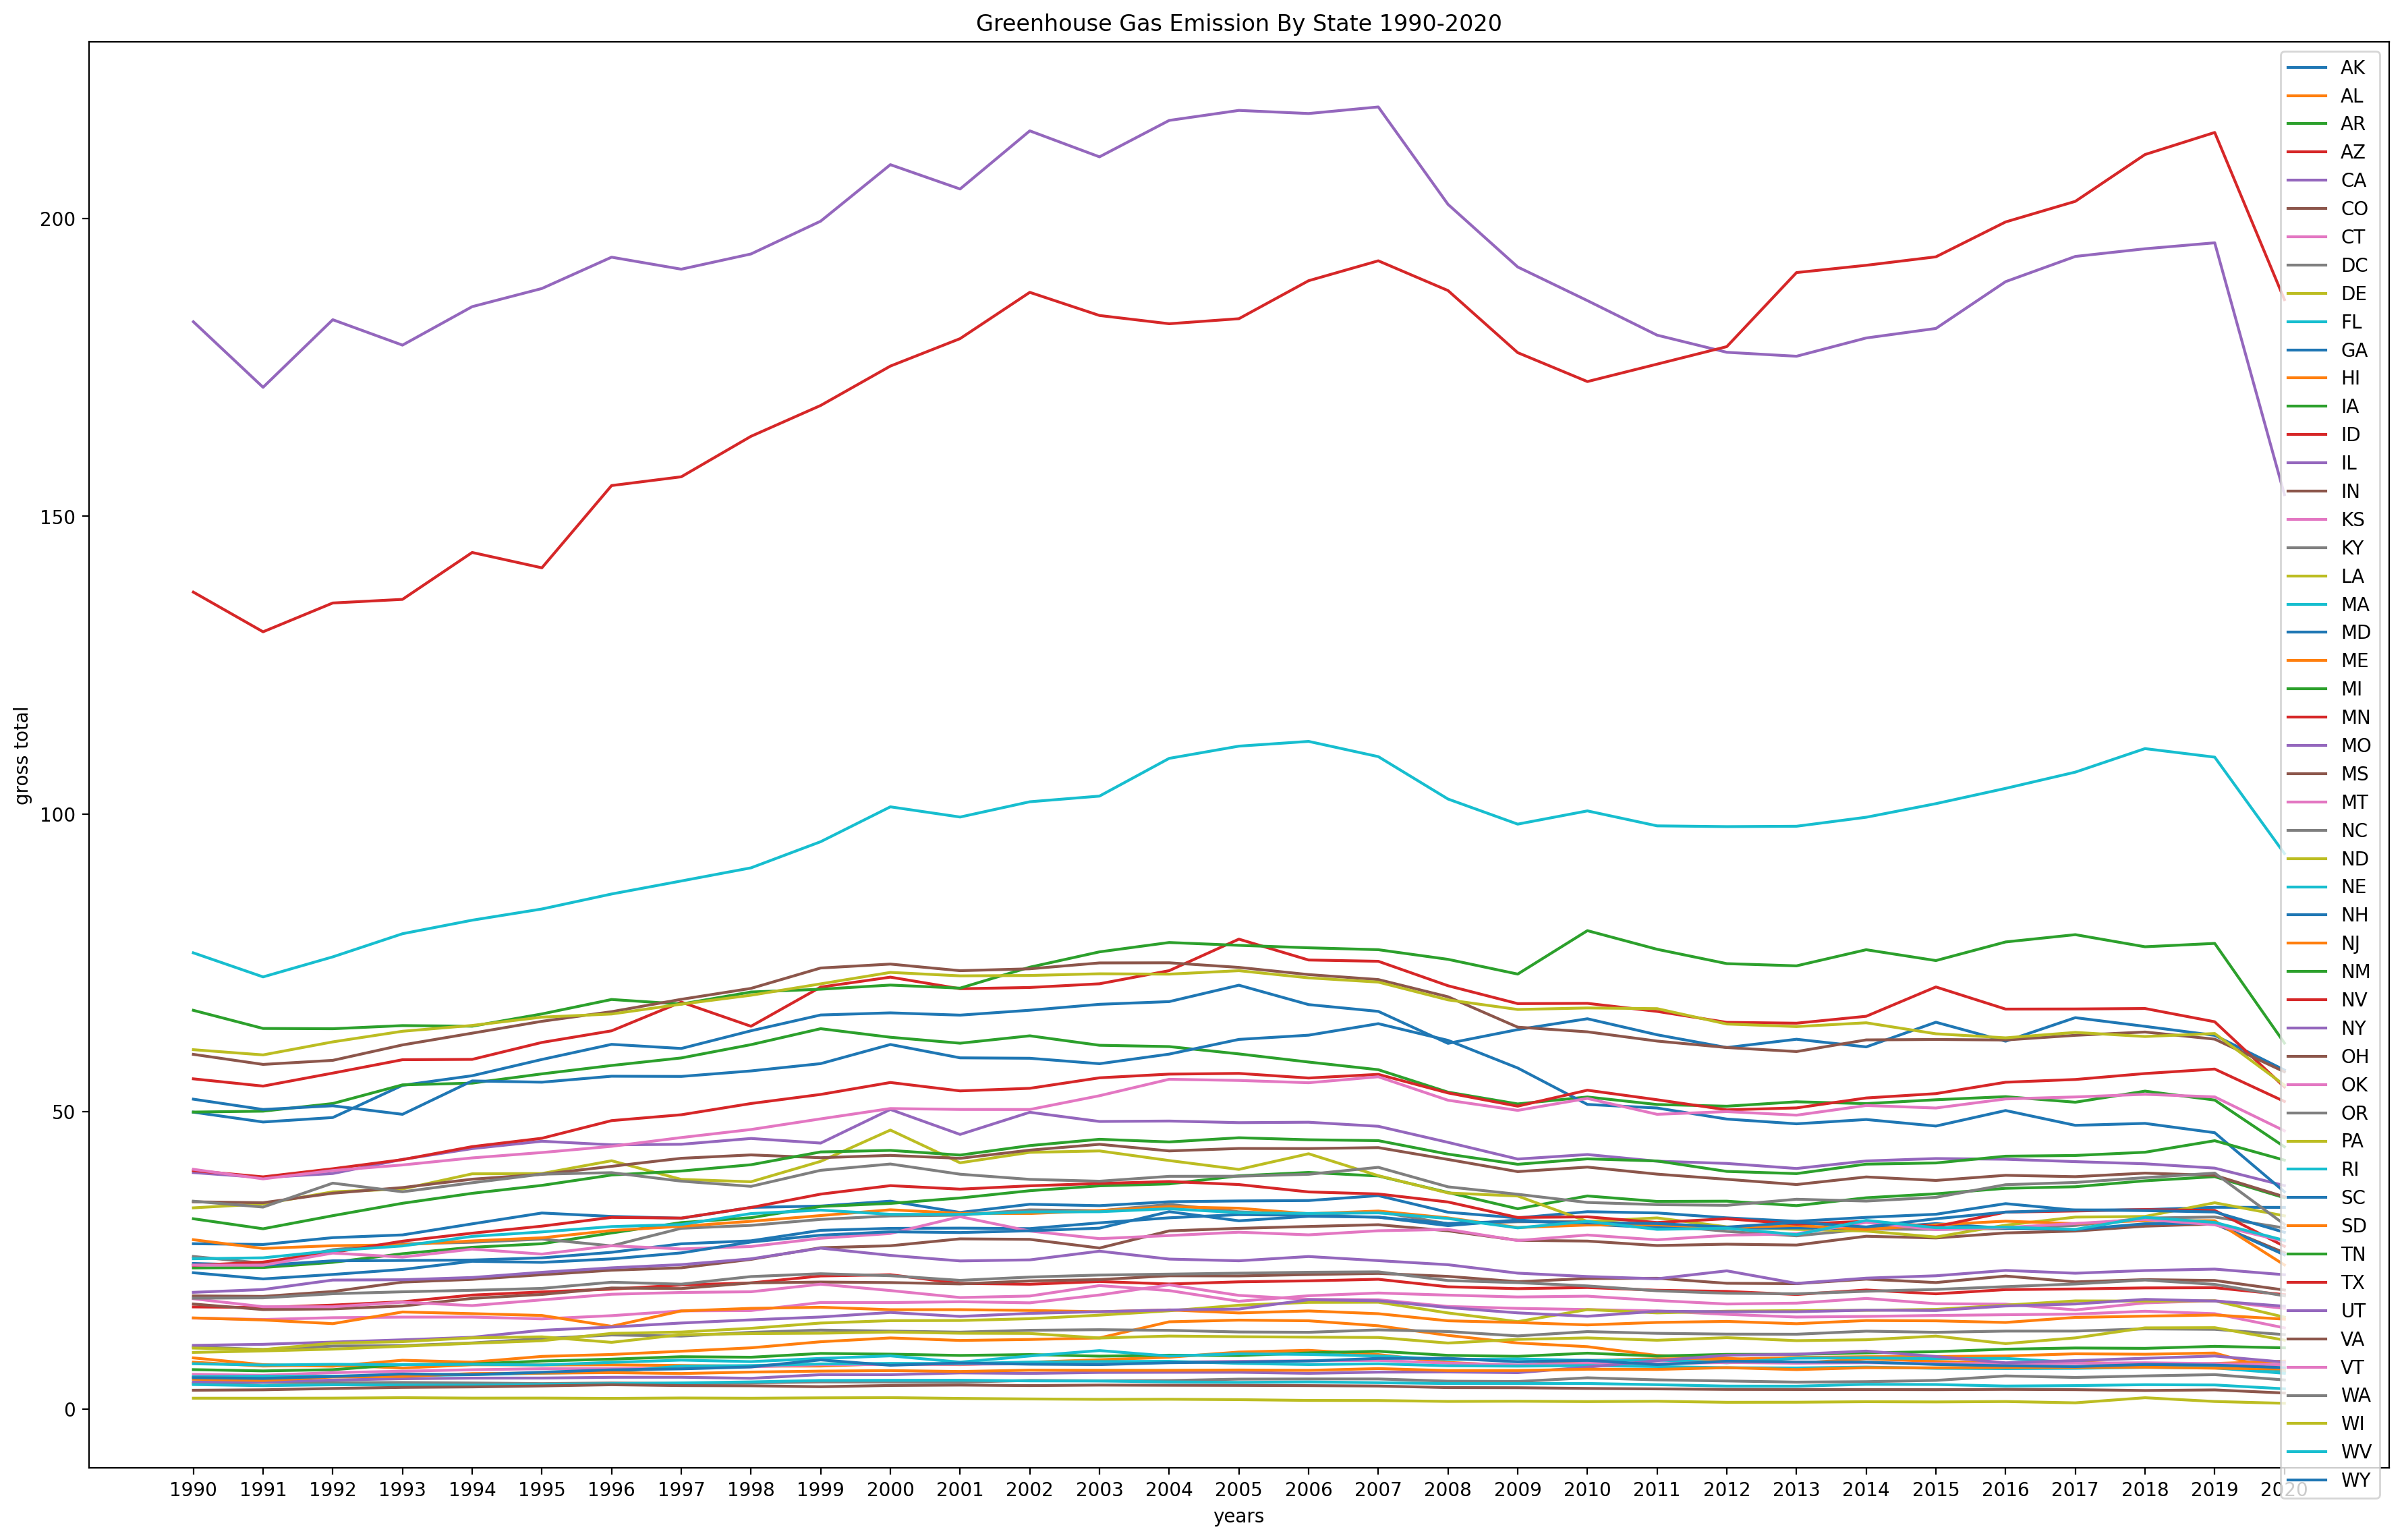

In [7]:
greenhouse = pd.read_csv('Greenhouse.csv', index_col = 0)

plt.subplots(figsize=(22,14), dpi=200)
for index, row in greenhouse.iterrows():
    plt.plot(row, label=index)    

plt.legend()
plt.xlabel('years')
plt.ylabel('gross total')
plt.title('Greenhouse Gas Emission By State 1990-2020')

plt.show()

As we can see from the line plot, we can see that there seems to be a steady increase in carbon emission throughout all states from 1990 to 2007. However, from 2007 to 2010 there was a decline in carbon emissions. This can most likely be attributed to the 2008 financial crisis, where the economic downturn led to less travel. From 2010 to 2019, carbon emissions again began to rise. From 2019 onward, there seems to be a decline yet again in carbon emissions. This can be attributed to the outbreak of the COVID-19 pandemic, which resulted in less people going out and traveling. California seems to be much higher in terms of carbon emissions compared to the other states, but this can be attributed to the higher population in California. As for the overall trend of the carbon emissions for each state over time, we can say that it seems like the carbon emissions are neither significantly increasing nor significantly decreasing, although it seems that in recent years the carbon emissions tend to trend towards decreasing. This recent trend towards decreasing emissions can be attributed to the recent push for governments to be greener and utilize more clean energy, such as promoting electric vehicles.

Text(0, 0.5, 'Count of States')

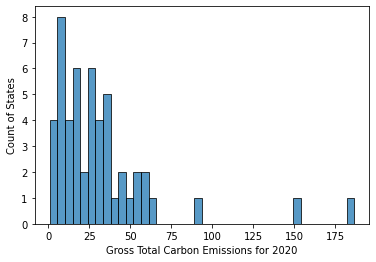

In [8]:
sns.histplot(data=merged_df, x="2020", bins=40)
plt.xlabel('Gross Total Carbon Emissions for 2020')
plt.ylabel('Count of States')

Inspecting the histogram for 2020, we can see most states are between 0 and 70. What are our outliers?

In [9]:
merged_df.sort_values(by="2020", ascending=False)[["HQ State", "2020"]].head()

,HQ State,2020
32,TX,186.398654
49,CA,153.641150
23,FL,93.343730
34,NM,61.511484
22,GA,56.975468


California, Texas, and Florida are the most populated states in the United States, so this correlation is understandable.

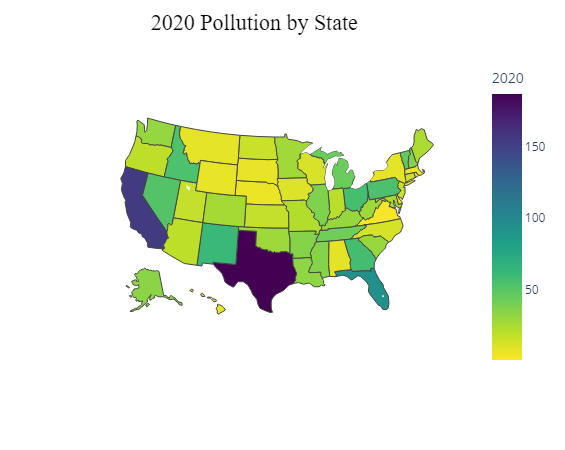

In [10]:
p = make_choropleth(df=merged_df, color="2020", title_text="2020 Pollution by State")
plt.show()
Image(filename="images/Pollution.png")

### Walkability

In [11]:
walkability_df = walkability_df.rename(columns={"D2B_E8MIXA": "EmploymentMix", 
                               "D3B": "IntersectionDensity", 
                               "D4A": "DistToTransit",
                               "D4B025" : "1/4MileToTransit",
                               "D4B050" : "1/2MileToTransit",
                               "D5BR" : "JobsWithin45MinTransit",
                               "D5BE": "PopWithin45MinTransit"})
walkability_df.describe()

,EmploymentMix,IntersectionDensity,DistToTransit,1/4MileToTransit,1/2MileToTransit,JobsWithin45MinTransit,PopWithin45MinTransit,NatWalkInd
count,51.000000,53.000000,51.000000,40.000000,40.000000,5.100000e+01,51.000000,53.000000
mean,0.565222,70.609569,504.516442,0.272026,0.454763,1.020381e+05,57291.123231,8.913157
std,0.035197,27.290949,106.994154,0.143804,0.169774,1.657631e+05,88898.090632,1.999743
min,0.500691,25.356053,263.704391,0.000049,0.000197,1.372714e+03,276.580110,4.322097
25%,0.539038,46.665058,450.927774,0.171160,0.341525,2.959117e+04,14788.580540,7.590638
50%,0.561604,66.584807,499.590653,0.258697,0.460680,5.630721e+04,37302.621477,8.611867
75%,0.576352,88.246437,554.299592,0.351723,0.562078,1.024914e+05,63239.830470,10.470168
max,0.660001,160.734818,900.162000,0.642835,0.809781,1.125233e+06,585632.693522,14.471481


Most states have a similar mix of employment types within block groups, as the 25% and 75% percentile are pretty close together. There's a wider range for pedestrian-oriented intersection density and distance to transit. 

It looks like not all states have data for jobs within 1/4 mile and 1/2 mile of fixed guideway transit stops. Let's check which ones.

In [12]:
list(walkability_df[walkability_df["1/4MileToTransit"].isna()]["STATEFP"])

['AL', 'HI', 'IA', 'ID', 'KS', 'MS', 'MT', 'ND', 'NE', 'SC', 'SD', 'VI', 'WY']

This somewhat makes sense. We only looked at positive values, so more rural states may not have much public transportation or very few cities do s.t. the average was close to 0. However, there may also be a gap in the dataset, as the walkability dataset took data from multiple sources.

Let's visualize the average intersection density, average distance to transit, and overall walkability indices. 

Let's look at intersection density first. Higher intersection density is correlated with more walk trips.

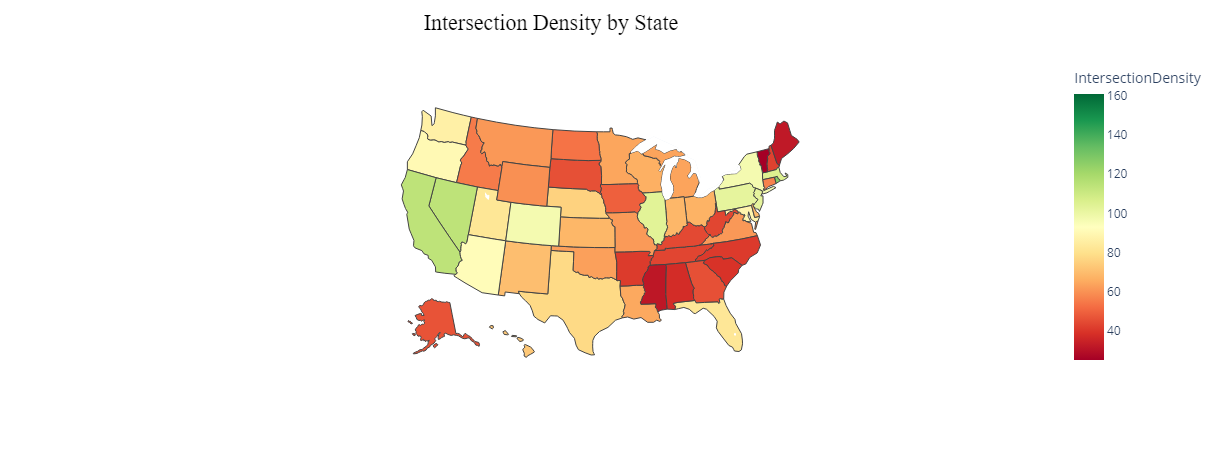

In [13]:
p = make_choropleth(df=merged_df, color="IntersectionDensity", title_text="Intersection Density by State",
                  color_continuous_scale="RdYlGn",)
p.show()
Image(filename="images/IntersectionDensity.png")

Most Southern states have pretty low intersection density. The top states in contrast are Rhode Island, Nevada, and California. Some influencing factors for each state are respectively the size of Rhode Island, Las Vegas, and the large cities like San Francisco.

Text(0, 0.5, 'Count of States')

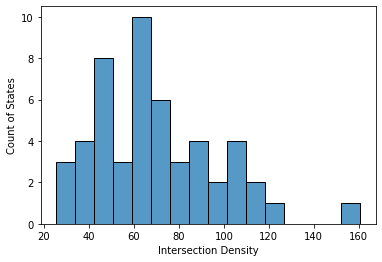

In [14]:
sns.histplot(data=merged_df, x="IntersectionDensity", bins=16)
plt.xlabel('Intersection Density')
plt.ylabel('Count of States')

In [15]:
merged_df.sort_values(by="IntersectionDensity", ascending=False)[["HQ State", "IntersectionDensity"]].head()

,HQ State,IntersectionDensity
15,DC,160.734818
4,RI,126.632724
47,NV,113.864916
49,CA,113.788509
6,MA,105.232940


From the distribution, it looks like our one significant outlier is the District of Columbia. Let's compare intersection density and pollution. From the earlier pollution graph, we saw pretty significant outliers for gross carbon emissions. If we directly look at the proportion, it pretty exactly matches up.

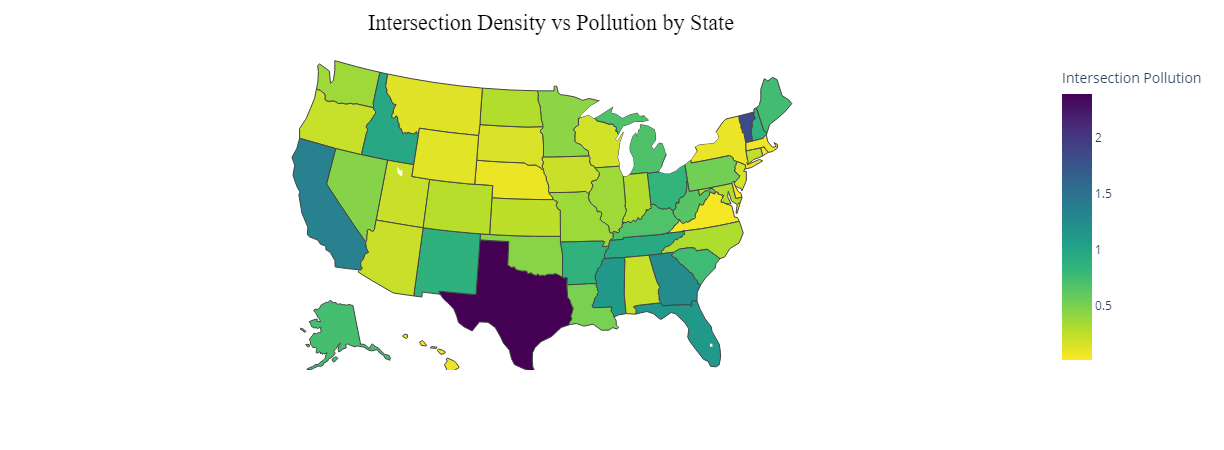

In [16]:
merged_df['Intersection Pollution'] = merged_df['2020'] / merged_df['IntersectionDensity']
p = make_choropleth(df=merged_df, color="Intersection Pollution", title_text="Intersection Density vs Pollution by State")
p.show()
Image(filename="images/IntersectionDensityVsPollution.png")

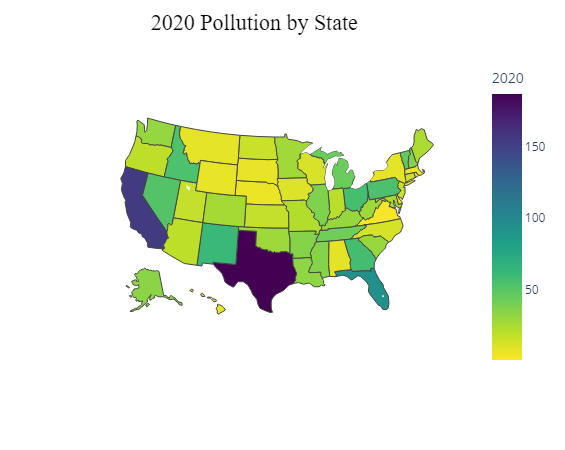

In [17]:
Image(filename="images/Pollution.png")

Let's try putting 2020 on a log scale to see if there's any difference.

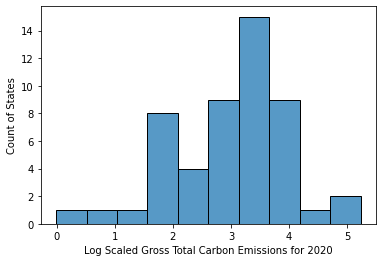

In [18]:
merged_df['2020_scaled'] = np.log(merged_df['2020'])
sns.histplot(data=merged_df, x="2020_scaled", bins=10)
plt.xlabel('Log Scaled Gross Total Carbon Emissions for 2020')
plt.ylabel('Count of States')
plt.show()

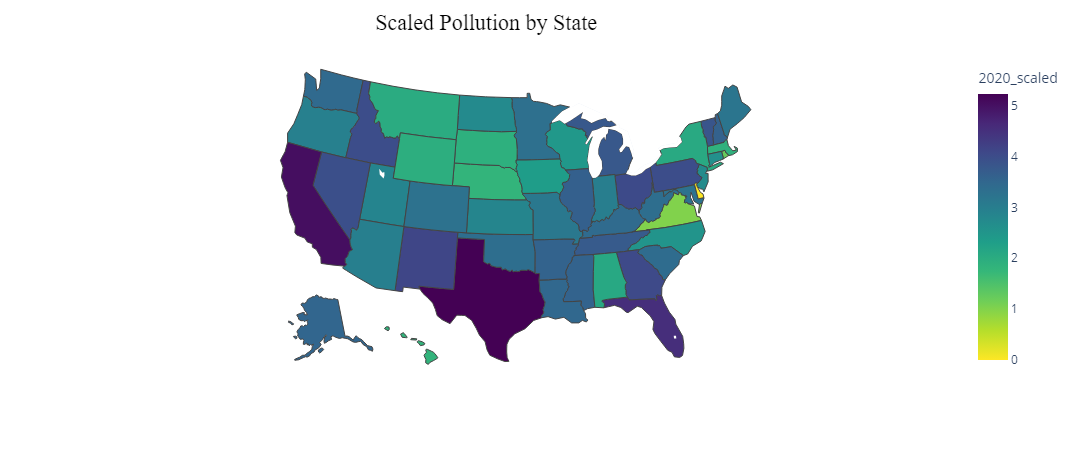

In [19]:
p = make_choropleth(df=merged_df, color="2020_scaled", title_text="Scaled Pollution by State")
p.show()
Image(filename="images/ScaledPollution.png")

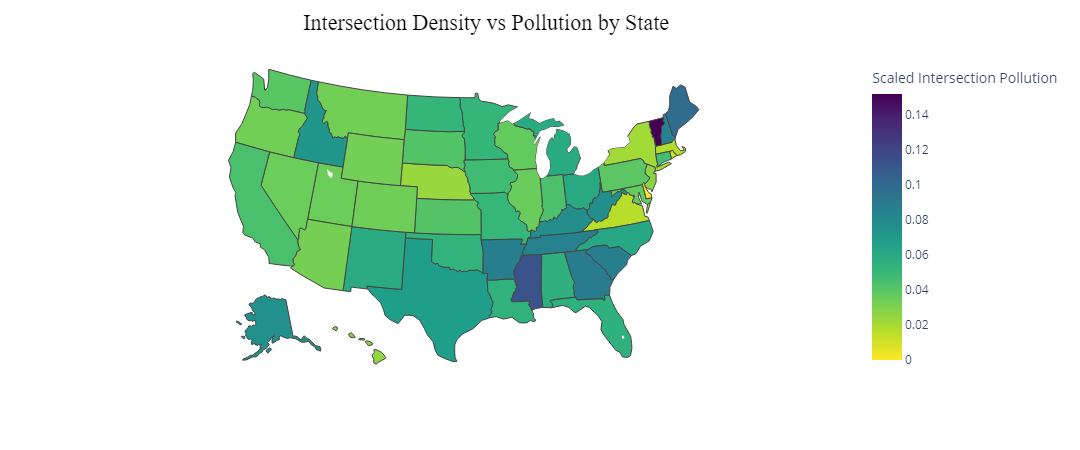

In [20]:
merged_df['Scaled Intersection Pollution'] = merged_df["2020_scaled"] / merged_df['IntersectionDensity']
p = make_choropleth(df=merged_df, color="Scaled Intersection Pollution", title_text="Intersection Density vs Pollution by State")
p.show()
Image(filename="images/ScaledIntersectionPollution.png")

More purple values: High pollution, low intersection density.  
More yellow values: High pollution, high intersection density OR low pollution, any intersection density.  

It looks like Vermont and Missouri have very high pollution compared to their intersection density.

Moving on to average distance to transit.

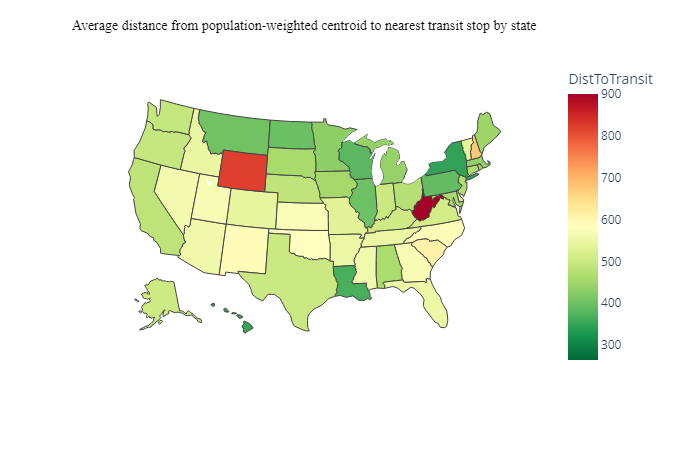

In [21]:
p = make_choropleth(df=walkability_df, 
                  locations="STATEFP",
                  color='DistToTransit',
                  color_continuous_scale="RdYlGn_r", 
                  title_font_size=14,
                  title_text = 'Average distance from population-weighted centroid to nearest transit stop by state',)
p.show()
Image(filename="images/AvgDistTransit.png")

There are a few notable outliers for distance from population-weighted centroids to nearest transit stop: Wyoming and West Virginia. Perhaps they don't have that much transportation, or it's concentrated in one part of the state? The top states, so lowest distance, are New York, Louisiana, and Hawaii.

Text(0, 0.5, 'Count of States')

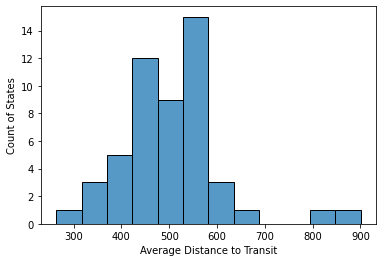

In [22]:
sns.histplot(data=merged_df, x="DistToTransit")
plt.xlabel('Average Distance to Transit')
plt.ylabel('Count of States')

In [23]:
walkability_df.sort_values(by="DistToTransit", ascending=False)[["STATEFP", "DistToTransit"]].head()

,STATEFP,DistToTransit
51,WV,900.162000
52,WY,820.764286
30,NH,676.426667
41,SC,610.460145
27,NC,588.834214


In the histogram above, we see that it follows a mostly normal distribution with our two outliers.

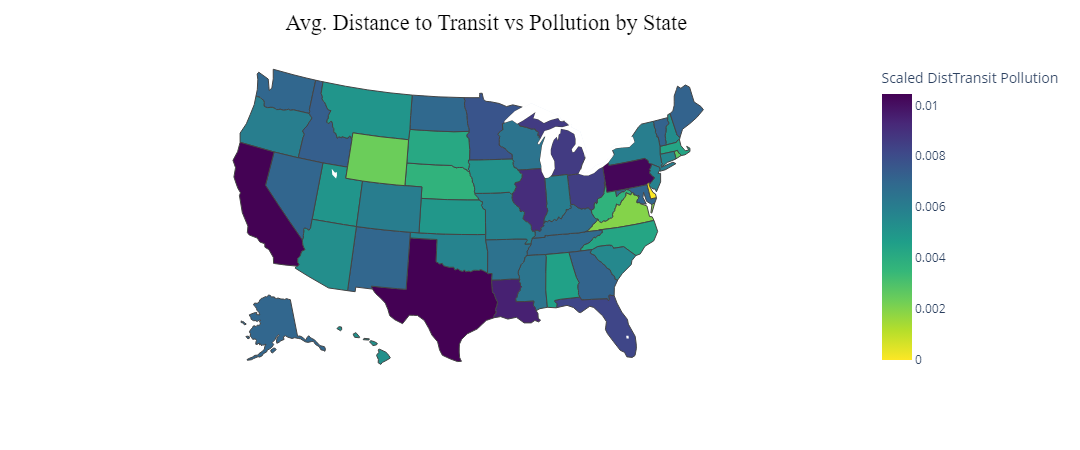

In [24]:
merged_df['Scaled DistTransit Pollution'] = merged_df["2020_scaled"] / merged_df['DistToTransit']
p = make_choropleth(df=merged_df, color="Scaled DistTransit Pollution", title_text="Avg. Distance to Transit vs Pollution by State")
p.show()

Image(filename="images/ScaledDistTransitPollution.png")

More purple: high pollution, low distance to transit  
More yellow: high pollution/high distance to transit, low pollution, any distance to transit

It looks like California, Texas, and Pennsylvania have very high pollution, but perhaps a lower distance to transit.
Delaware is the most yellow. Delaware was on the lowest for pollution, so it makes sense that even though it was in the middle for distance to transit, it's still at the bottom here.

Finally, let's look at walkability.

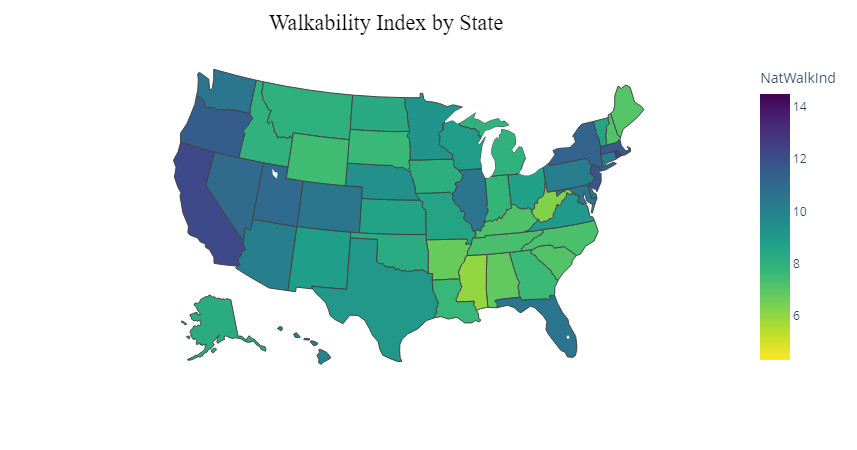

In [25]:
p = make_choropleth(df=merged_df, color="NatWalkInd", title_text="Walkability Index by State")
p.show()
Image(filename="images/Walkability.png")

Text(0, 0.5, 'Count of States')

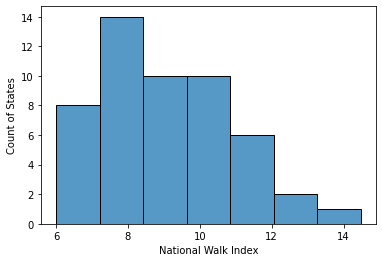

In [26]:
sns.histplot(data=merged_df, x="NatWalkInd")
plt.xlabel('National Walk Index')
plt.ylabel('Count of States')

Small states seem to have higher walkability indices, with California a notable outlier in size among the top 5. From the distribution, there's no outlier separated from the pack, although one state/territory broke 14.

In [27]:
walkability_df.sort_values(by="NatWalkInd", ascending=False)[["STATEFP", "NatWalkInd"]].head()

,STATEFP,NatWalkInd
7,DC,14.471481
40,RI,12.587935
4,CA,12.224970
31,NJ,11.868249
19,MA,11.627215


In [28]:
walkability_df.sort_values(by="NatWalkInd", ascending=True)[["STATEFP", "NatWalkInd"]].head()

,STATEFP,NatWalkInd
47,VI,4.322097
39,PR,4.618350
25,MS,6.004544
51,WV,6.285385
2,AR,6.722559


Notice that our top value is the District of Columbia, which has an extremely small area. On the other hand, the Virgin Islands and Puerto Rico, which are islands, have very low walkability. For the continental U.S., Missouri, West Virginia, and Arizona round out the bottom.

Let's look at how it compares to pollution.

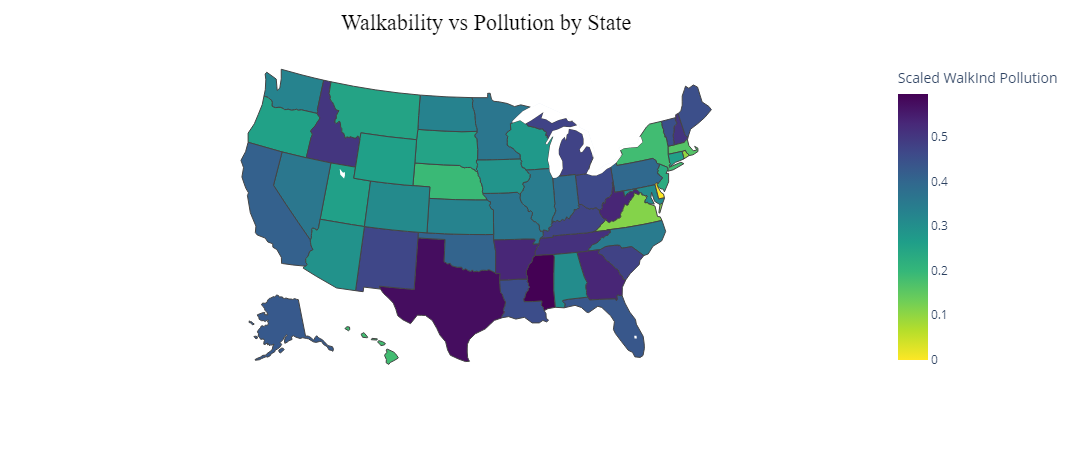

In [29]:
merged_df['Scaled WalkInd Pollution'] = merged_df["2020_scaled"] / merged_df['NatWalkInd']
p = make_choropleth(df=merged_df, color="Scaled WalkInd Pollution", title_text="Walkability vs Pollution by State")
p.show()

Image(filename="images/ScaledWalkIndPollution.png")

More purple: High pollution, low walkability  
More yellow: High pollution/high walkability OR low pollution/any walkability  

Looks like Texas and Missouri are the worst in terms of pollution vs walkability, with Georgia an interesting difference among the Southern states. Delaware and Virginia are once again on the bottom, but both had very low carbon emissions.

# Ridership

We already cleaned and calculated miles per person(total miles/population) and trips per person(total trips/population). We want to plot this by state, but as we learned in class traditional statistics are not really applicable to geospatial data. Thus, we'll also plot this data on a choropleth map, which is useful for seeing visual patterns, we can try and compare by state the amount of pollution and the amount of public transport usage.

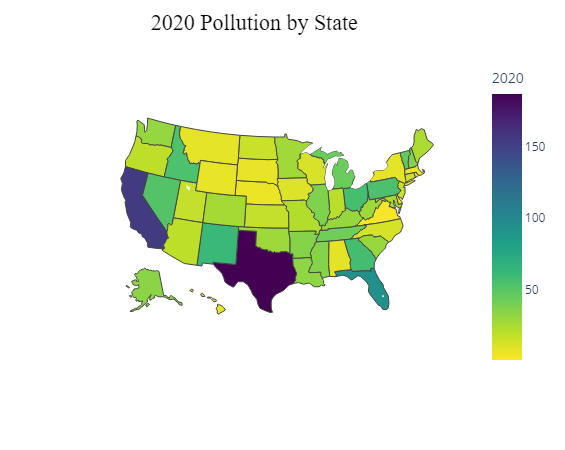

In [30]:
p = make_choropleth(df=merged_df, color="2020", title_text="Pollution by state")
p.show()
Image(filename="images/Pollution.png")

We can see that states like CA and TX and FL have high pollution, probably because of their large population sizes. However, in the below graph, it is shown that CA and TX and FL have lower Trips Per Person, around 7, showing that despite having large amounts of population and pollution, they have less public transportation usage on average, which could be a factor in their large amount of pollution. 

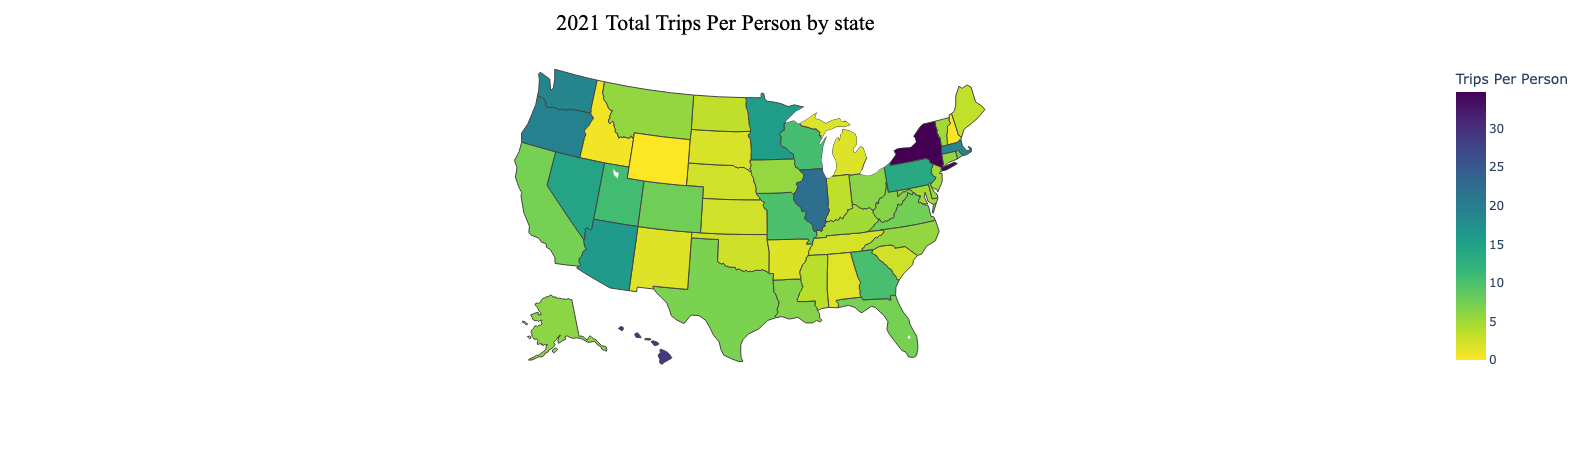

In [31]:
p = make_choropleth(df=merged_df, color="Trips Per Person", title_text="Trips per person by state")
p.show()
Image(filename="images/TPP.png")

We can see that states like WA, OR, IL, and especially NY have extremely high transportation usage. If we look at the pollution graph, they all seem to have lower pollution amounts. 

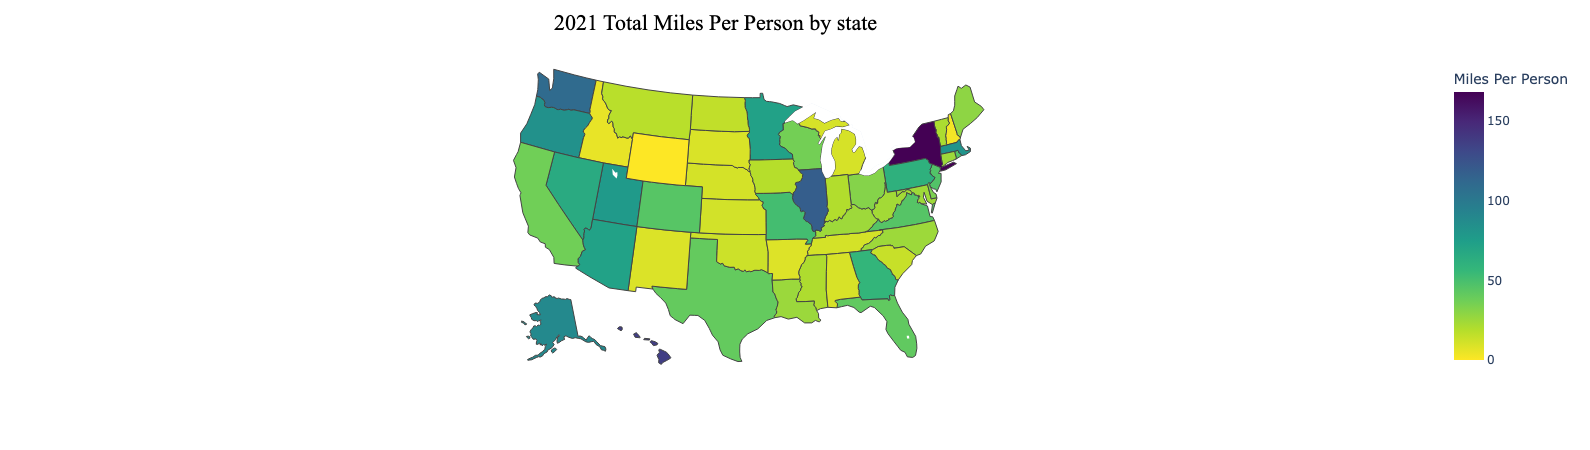

In [32]:
p = make_choropleth(df=merged_df, color="Miles Per Person", title_text="Miles per person by state")
p.show()
Image(filename="images/MPP.png")

The same goes for Miles Per Person, states with higher transportation usage outliers tend to have lower pollution, and vice versa.

Now, we can try to visualize 

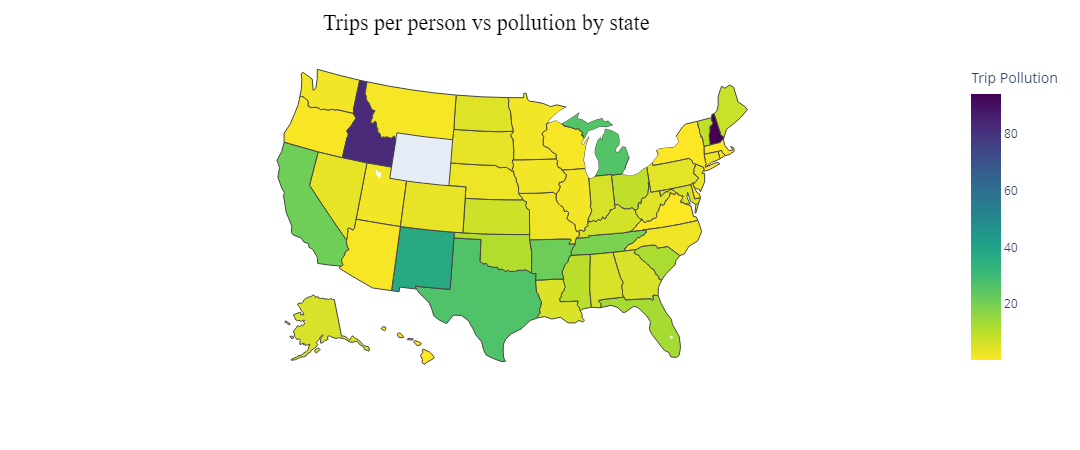

In [33]:
p = make_choropleth(df=merged_df, color="Trip Pollution", title_text="Trips per person vs pollution by state")
p.show()
Image(filename="images/TPPPollution.png")

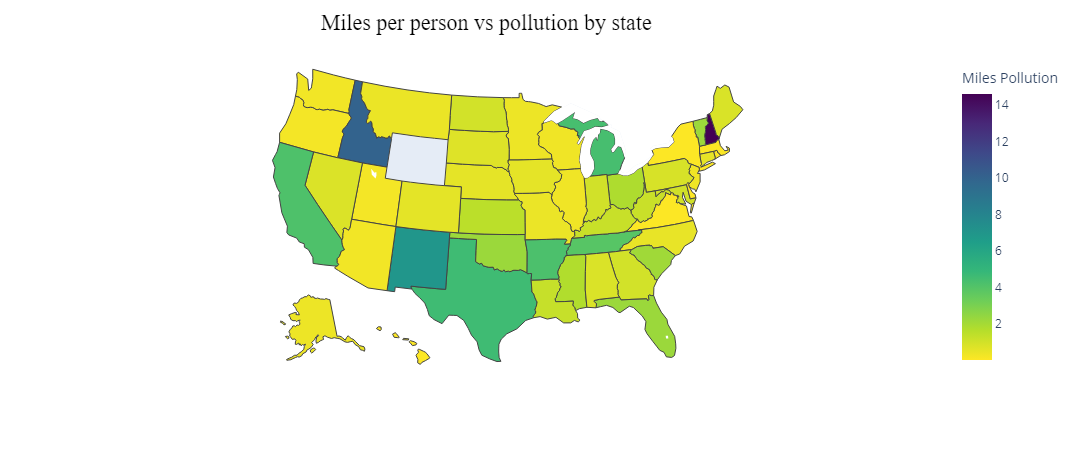

In [34]:
p = make_choropleth(df=merged_df, color="Miles Pollution", title_text="Miles per person vs pollution by state")
p.show()
Image(filename="images/MPPPollution.png")

Out of curiosity, in the graphs above we divide pollution by Miles Per Person and Trips Per Person, so states with higher Miles/Trip Pollution values have higher Pollution/Public Transportation ratios, meaning that there is more pollution and less transportation. States with higher numbers(blue/green) have higher pollution/avg public transportation usage, meaning high amounts of pollution and low transportation usage. Note that WY has no data because the ridership data did not contain any data for it. 

# Ethics & Privacy

There shouldn’t be any privacy/terms of use issues, as the datasets we used are open to the public, and they are all government datasets, meaning people probably consented to their use when they were surveyed. We don’t anticipate any issues that will be problematic to data privacy for the same reasons.
There might be possible biases, because we are only including data in America (we plan to use the national datasets), and America is a very car-centric country. However, this is the point, we want to measure it in America specifically because we are car-centric, and we want to see if the car focus of our country creates more pollution, and if providing more alternative options would decrease it. 

We don’t think there will be biases related to equitable analysis, because government surveys attempt to reach as many people as possible. There could be the event where certain more rural places have less responses to surveys, because they are more out of the way, and maybe more rich/educated people would respond to a survey. In addition to that, maybe more low-income areas would use public transportation if cars are too expensive. 
We could also compare the data from place to place(e.g. One with more public transport than another), and see if there are noticeable differences. Though this might be an issue as well, since the amount of places with public transportation are far and few between, mostly being in cities located on the Eastern Seaboard, which may make relevant comparisons more difficult (especially with the Western US, which was largely expanded during the post WWII years that emphasized car culture and highway construction).

Because we are trying to use national datasets, we can hopefully encompass both high-income and low-income areas, to fix the issue of income bias, and the idea of survey bias should be acknowledged, but we don’t really know how we would include people in data who wouldn’t normally respond to a survey anyway, so this is likely the best option.

We could also handle options we’ve identified by perhaps finding more data or find other comparable places, perhaps in similar nations like Canada which are very close in culture and construction as well. 

# Conclusion & Discussion

We asked whether cities in America with higher walkability indices, more public transportation infrastructure, and high public transit ridership numbers equates to less smog pollution. After analyzing the data, we decided that indeed, it appears that those three factors are related to less smog pollution. 

States with higher higher intersection density seem to have less pollution when we compare Intersection Density vs Pollution by State. While some outliers like Vermont & Missouri have high pollution compared to intersection density, perhaps that could be explained by their industries that result in higher pollution amounts. 

In terms of walkability, it seems the more walkable a city is, the less carbon pollution there is. 

Also, related to pollution is the fact that when there is public transit in a state, this results in less pollution, as seen with states like WA, OR, IL, and NY where they have high public transit usage and lower pollution, while CA, TX, and FL have less public transit and thus pollute more.

Limitations include the fact that we are only constrained to 50 states, the fact that pollution measurements were taken in only 1 area as opposed to multiple areas in said state, and that the pandemic has disrupted public transit. (edited)



# Team Contributions

- Sam: Lead, walkability data cleaning and analysis
- Justin/Thuan: ridership data cleaning and analysis
- Jeffrey/Naasik: greenhouse data cleaning and analysis
- All: Background, research question/hypothesis, ethics, conclusion/discussion